In [1]:

from torchvision.datasets import MNIST
import torch
import torchvision
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
%matplotlib inline

# Use a white background for matplotlib figures
matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [2]:
dataset = MNIST(root='data/', download=True, transform=ToTensor())
dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train
    StandardTransform
Transform: ToTensor()

In [3]:
dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [17]:
image, label = dataset[0]
print('image.shape:',image.shape)


image.shape: torch.Size([1, 28, 28])


In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
print('Label:', label)

Label: 5


In [12]:
image.permute(1,2,0).shape

torch.Size([28, 28, 1])

TypeError: Invalid shape (1, 28, 28) for image data

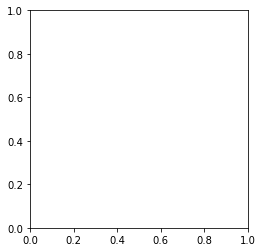

In [13]:
plt.imshow(image.permute(0,1,2), cmap='gray')
# To solve this probem, I will try to the below steps.

In [91]:
#import matplotlib.pyplot as plt
#image = np.expand_dims(image, axis=0)  # or axis=1
#plt.imshow(a)
#plt.show()
#image.shape


(1, 1, 28, 28)

In [93]:
#type(image)

numpy.ndarray

In [94]:
#image=torch.from_numpy(image)
#image.shape
#type(image)

torch.Tensor

let's use the random_split helper function to set aside 10000 images for our validation set.

In [20]:
val_size= 10000
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset, [50000,10000])
len(train_ds),len(val_ds)

(50000, 10000)

In [21]:
batch_size = 128

In [22]:
train_loader = DataLoader(train_ds, batch_size=4, shuffle=True, num_workers=4, pin_memory=True)

In [25]:
train_loader = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)

Let's visualize a batch of data in a grid using the make_grid function from torchvision. We'll also use the .permute method on the tensor to move the channels to the last dimension, as expected by matplotlib.

images.shape: torch.Size([1, 28, 28])


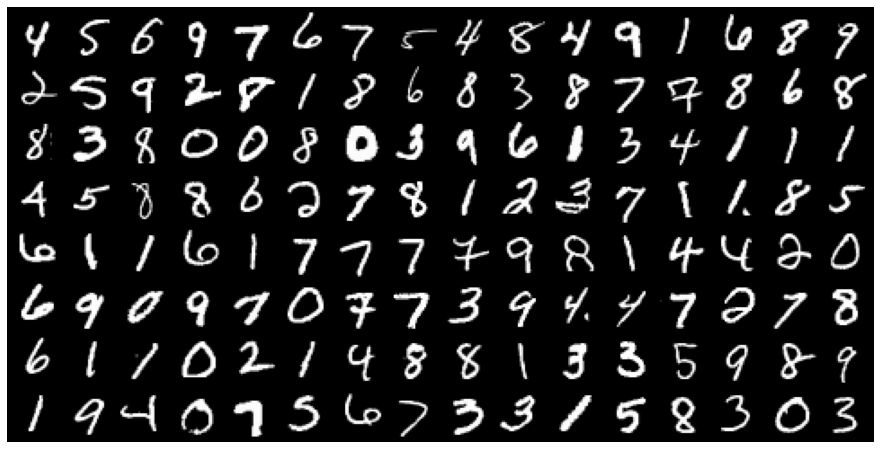

In [26]:
for images, _ in train_loader:
    print('images.shape:',image.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1,2,0)))
    break

Hidden Layers, Activation Functions and Non-Linearity
We'll create a neural network with two layers: a hidden layer and an output layer. Additionally, we'll use an activation function between the two layers. Let's look at a step-by-step example to learn how hidden layers and activation functions can help capture non-linear relationships between inputs and outputs.



First, let's create a batch of inputs tensors. We'll flatten the 1x28x28 images into vectors of size 784, so they can be passed into an nn.Linear object.

In [27]:
for images, labels in train_loader:
    print('images.shape:',images.shape)
    inputs = images.reshape(-1,784)
    print('inputs.shape:',inputs.shape)
    break

images.shape: torch.Size([128, 1, 28, 28])
inputs.shape: torch.Size([128, 784])


Next, let's create a nn.Linear object, which will serve as our hidden layer. We'll set the size of the output from the hidden layer to 32. This number can be increased or decreased to change the learning capacity of the model.

In [20]:
input_size = inputs.shape[-1]
hidden_size = 32

In [28]:
layer1 = nn.Linear(input_size, hidden_size)
layer1
# intermediate outputs for the batch of images by 
#passing inputs through layer1.

Linear(in_features=784, out_features=32, bias=True)

In [22]:
inputs.shape

torch.Size([128, 784])

In [29]:
layer1_outputs = layer1(inputs)
print('layer1_outputs.shape:',layer1_outputs.shape)

layer1_outputs.shape: torch.Size([128, 32])


The image vectors of size 784 are transformed into intermediate output vectors of length 32 by performing a matrix multiplication of inputs matrix with the transposed weights matrix of layer1 and adding the bias. We can verify this using torch.allclose. For a more detailed explanation, review the tutorial on linear regression.

In [30]:
layer1_outputs_direct = inputs @ layer1.weight.t() + layer1.bias
layer1_outputs_direct.shape


torch.Size([128, 32])

In [31]:
torch.allclose(layer1_outputs, layer1_outputs_direct, 1e-3)

True

Thus, layer1_outputs and inputs have a linear relationship, i.e., each element of layer_outputs is a weighted sum of elements from inputs. Thus, even as we train the model and modify the weights, layer1 can only capture linear relationships between inputs and outputs.

Next, we'll use the Rectified Linear Unit (ReLU) function as the activation function for the outputs. It has the formula relu(x) = max(0,x) i.e. it simply replaces negative values in a given tensor with the value 0. ReLU is a non-linear function, as seen here visually:

In [33]:
#use the F.relu method to apply ReLU to the elements of a tensor.
F.relu(torch.tensor([[1,-1,0],[-0.1,.2,3]]))

tensor([[1.0000, 0.0000, 0.0000],
        [0.0000, 0.2000, 3.0000]])

In [32]:
relu_outputs = F.relu(layer1_outputs)
print('min(layer1_outputs):',torch.min(layer1_outputs).item())
print('min(relu_outputs):',torch.min(relu_outputs).item())

min(layer1_outputs): -0.7129530906677246
min(relu_outputs): 0.0


Now that we've applied a non-linear activation function, relu_outputs and inputs do not have a linear relationship. We refer to ReLU as the activation function, because for each input certain outputs are activated (those with non-zero values) while others turned off (those with zero values)

In [35]:
output_size = 10
layer2 = nn.Linear(hidden_size, output_size)


In [36]:
layer2_outputs = layer2(relu_outputs)
print(layer2_outputs.shape)

torch.Size([128, 10])


In [30]:
inputs.shape

torch.Size([128, 784])

As expected, layer2_outputs contains a batch of vectors of size 10. We can now use this output to compute the loss using F.cross_entropy and adjust the weights of layer1 and layer2 using gradient descent.

In [37]:
loss_fn=F.cross_entropy
loss=loss_fn(layer2_outputs, labels)
loss

tensor(2.3251, grad_fn=<NllLossBackward>)

Thus, our model transforms inputs into layer2_outputs by applying a linear transformation (using layer1), followed by a non-linear activation (using F.relu), followed by another linear transformation (using layer2). Let's verify this by re-computing the output using basic matrix operations.

In [38]:
# Expanded version of layer2(F.relu(layer1(inputs)))
outputs = (F.relu(inputs @ layer1.weight.t()+ layer1.bias))@layer2.weight.t()+layer2.bias

In [47]:
outputs.shape

torch.Size([128, 10])

In [48]:
torch.allclose(outputs, layer2_outputs, 1e-3)

False

Note that outputs and inputs do not have a linear relationship due to the non-linear activation function F.relu. As we train the model and adjust the weights of layer1 and layer2, we can now capture non-linear relationships between the images and their labels. In other words, introducing non-linearity makes the model more powerful and versatile. Also, since hidden_size does not depend on the dimensions of the inputs or outputs, we vary it to increase the number of parameters within the model. We can also introduce new hidden layers and apply the same non-linear activation after each hidden layer.

The model we just created is called a neural network. A deep neural network is simply a neural network with one or more hidden layers. In fact, the Universal Approximation Theorem states that a sufficiently large & deep neural network can compute any arbitrary function i.e. it can learn rich and complex non-linear relationships between inputs and targets. Here are some examples:

Identifying if an image contains a cat or a dog (or something else)
Identifying the genre of a song using a 10-second sample
Classifying movie reviews as positive or negative based on their content
Navigating self-driving cars using a video feed of the road
Translating sentences from English to French (and hundreds of other languages)
Converting a speech recording to text and vice versa
And many more...
It's hard to imagine how the simple process of multiplying inputs with randomly initialized matrices, applying non-linear activations, and adjusting weights repeatedly using gradient descent can yield such astounding results. Deep learning models often contain millions of parameters, which can together capture far more complex relationships than the human brain can comprehend.

If we hadn't included a non-linear activation between the two linear layers, the final relationship between inputs and outputs would still be linear. A simple refactoring of the computations illustrates this.

In [61]:
# Same as layer2(layer1(inputs))
outputs2 = (inputs @ layer1.weight.t()+layer1.bias)@layer2.weight.t()+layer2.bias

In [62]:
combined_layer = nn.Linear(input_size, output_size)
combined_layer 

Linear(in_features=784, out_features=10, bias=True)

In [63]:
# Create a single layer to replace the two linear layers
combined_layer = nn.Linear(input_size, output_size)

combined_layer.weight.data = layer2.weight @ layer1.weight
combined_layer.bias.data = layer1.bias @ layer2.weight.t() + layer2.bias

In [64]:
# Same as combined_layer(inputs)
outputs3 = inputs@combined_layer .weight.t() + combined_layer.bias

In [65]:
torch.allclose(outputs2, outputs3, 1e-3)

True

In [54]:
!pip install jovian --upgrade --quiet
import jovian
jovian.commit(project='04-feedforward-nn')

Retrying (Retry(total=4, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<pip._vendor.urllib3.connection.VerifiedHTTPSConnection object at 0x105f65b20>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known')': /simple/jovian/
Retrying (Retry(total=3, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<pip._vendor.urllib3.connection.VerifiedHTTPSConnection object at 0x105f657f0>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known')': /simple/jovian/
Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<pip._vendor.urllib3.connection.VerifiedHTTPSConnection object at 0x105f659a0>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known')': /simple/jovian/
Retrying (Retry(total=1, connect=None, r

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "erfq1031/04-feedforward-nn" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/erfq1031/04-feedforward-nn


'https://jovian.ai/erfq1031/04-feedforward-nn'

Model

Instead of using a single nn.Linear object to transform a batch of inputs (pixel intensities) into outputs (class probabilities), we'll use two nn.Linear objects. Each of these is called a layer in the network.
The first layer (also known as the hidden layer) will transform the input matrix of shape batch_size x 784 into an intermediate output matrix of shape batch_size x hidden_size. The parameter hidden_size can be configured manually (e.g., 32 or 64).
We'll then apply a non-linear activation function to the intermediate outputs. The activation function transforms individual elements of the matrix.
The result of the activation function, which is also of size batch_size x hidden_size, is passed into the second layer (also known as the output layer). The second layer transforms it into a matrix of size batch_size x 10. We can use this output to compute the loss and adjust weights using gradient descent.

In [66]:
#define the model by extending the nn.Module class from PyTorch.
class MnistModel(nn.Module):
    """Feedfoward neural network with 1 hidden layer"""
    def __init__(self, in_size, hidden_size, out_size):
        super().__init__()
        # hidden layer
        self.linear1 = nn.Linear(in_size, hidden_size)
        # output layer
        self.linear2 = nn.Linear(hidden_size, out_size)
        
    def forward(self, xb):
        # Flatten the image tensors
        xb = xb.view(xb.size(0),-1)
        # Get intermediate outputs using hidden layer
        out = self.linear1(xb)
        # Apply activation function
        out = F.relu(out)
        # Get predictions using output layer
        out = self.linear2(out)
        return out
    
    
    def training_step(self, batch):
        images, labels = batch
        out = self(images)  # Generate predictions
        loss = F.cross_entropy(out, labels)# Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch
        out = self(images)# Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        acc = accuracy(out, labels)# Calculate accuracy
        return {'val_loss':loss, 'val_acc':acc}
    
    
    
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean() # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()# Combine accuracies
        return {'val_loss':epoch_loss.item(), 'val_acc':epoch_acc.item()}
    
    
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss:{:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
        
        

We also need to define an accuracy function which calculates the accuracy of the model's prediction on an batch of inputs. It's used in validation_step above.

In [67]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item()/len(preds))

We also need to define an accuracy function which calculates the accuracy of the model's prediction on an batch of inputs. It's used in validation_step above.

In [116]:
input_size = 784
hidden_size =32# you can change this
num_classes =10

In [69]:
model = MnistModel(input_size, hidden_size=32, out_size=num_classes)

Let's take a look at the model's parameters. We expect to see one weight and bias matrix for each of the layers.

In [70]:
for t in model.parameters():
    print(t.shape)

torch.Size([32, 784])
torch.Size([32])
torch.Size([10, 32])
torch.Size([10])


Let's try and generate some outputs using our model. We'll take the first batch of 128 images from our dataset and pass them into our model.

In [72]:
for images, labels in train_loader:
    outputs = model(images)
    loss = F.cross_entropy(outputs, labels)
    print("Loss:", loss.item())
    break
    
print('outputs.shape:',outputs.shape)
print('Sample outputs:/n', outputs[:2].data)

Loss: 2.3100504875183105
outputs.shape: torch.Size([128, 10])
Sample outputs:/n tensor([[ 0.1067, -0.0296,  0.1103,  0.0194,  0.2562, -0.0630, -0.1709,  0.1124,
         -0.1281,  0.2536],
        [ 0.0761,  0.0773,  0.1425,  0.1883,  0.1309,  0.0966, -0.2593, -0.0005,
         -0.2425,  0.1163]])


Using a GPU
As the sizes of our models and datasets increase, we need to use GPUs to train our models within a reasonable amount of time. GPUs contain hundreds of cores optimized for performing expensive matrix operations on floating-point numbers quickly, making them ideal for training deep neural networks. You can use GPUs for free on Google Colab and Kaggle or rent GPU-powered machines on services like Google Cloud Platform, Amazon Web Services, and Paperspace.


In [73]:
torch.cuda.is_available()

False

Let's define a helper function to ensure that our code uses the GPU if available and defaults to using the CPU if it isn't.

In [75]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

In [76]:
device = get_default_device()
device

device(type='cpu')

#Next, let's define a function that can move data and model to a chosen device.

In [77]:
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data,(list,tuple)):
        return[to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

In [78]:
for images, labels in train_loader:
    print(images.shape)
    images = to_device(images, device)
    print(images.device)
    break

torch.Size([128, 1, 28, 28])
cpu


Finally, we define a DeviceDataLoader class to wrap our existing data loaders and move batches of data to the selected device. Interestingly, we don't need to extend an existing class to create a PyTorch datal oader. All we need is an __iter__ method to retrieve batches of data and an __len__ method to get the number of batches.

In [80]:
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b, self.device)
            
    def __len__(self):
        """Number of batches"""
        return len(self.dl)
        


The yield keyword in Python is used to create a generator function that can be used within a for loop, as illustrated below.

In [81]:
def some_numbers():
    yield 10
    yield 20
    yield 30
    
for value in some_numbers():
    print(value)

10
20
30


We can now wrap our data loaders using DeviceDataLoader

In [82]:
train_loader = DeviceDataLoader(train_loader, device)
val_loader = DeviceDataLoader(val_loader, device)

Tensors moved to the GPU have a device property which includes that word cuda. Let's verify this by looking at a batch of data from valid_dl.

In [83]:
for xb, yb in val_loader:
    print('xb.device:',xb.device)
    print('yb:',yb)
    break

xb.device: cpu
yb: tensor([7, 7, 1, 4, 5, 7, 0, 4, 7, 4, 4, 8, 6, 7, 2, 8, 9, 8, 9, 1, 2, 2, 9, 3,
        9, 3, 8, 6, 9, 3, 5, 1, 4, 7, 7, 0, 7, 5, 8, 2, 6, 9, 9, 2, 5, 6, 6, 3,
        7, 7, 2, 0, 2, 0, 6, 8, 6, 3, 8, 4, 2, 5, 1, 9, 4, 1, 2, 7, 9, 6, 7, 5,
        2, 6, 3, 7, 5, 4, 3, 0, 0, 8, 3, 0, 4, 7, 7, 8, 1, 2, 7, 7, 3, 5, 2, 2,
        6, 1, 9, 2, 3, 8, 5, 7, 2, 9, 5, 6, 3, 3, 2, 9, 3, 9, 8, 4, 0, 5, 4, 9,
        8, 1, 3, 4, 3, 3, 3, 7, 1, 8, 5, 6, 4, 6, 2, 1, 2, 2, 6, 6, 3, 4, 7, 9,
        2, 0, 5, 4, 2, 3, 2, 9, 0, 2, 5, 7, 6, 2, 8, 2, 5, 0, 7, 1, 6, 2, 4, 3,
        6, 1, 8, 5, 4, 8, 1, 7, 5, 0, 6, 7, 3, 4, 0, 9, 9, 5, 0, 7, 1, 6, 5, 2,
        2, 8, 7, 2, 1, 6, 8, 6, 7, 1, 0, 7, 1, 3, 2, 2, 1, 3, 5, 7, 7, 8, 5, 4,
        9, 3, 6, 1, 6, 5, 2, 7, 2, 7, 7, 3, 2, 4, 1, 2, 8, 1, 3, 6, 3, 9, 9, 9,
        4, 8, 8, 2, 6, 4, 0, 1, 2, 4, 7, 4, 1, 6, 6, 0])


In [113]:
def evaluate(model, val_loader):
     """Evaluate the model's performance on the validation set"""
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)
    

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 3)

In [107]:
def evaluate(model, val_loader):
    """Evaluate the model's performance on the validation set"""
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [108]:

    
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    """Train the model using gradient descent"""
    history=[]
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
         # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history
        
    

Before we train the model, we need to ensure that the data and the model's parameters (weights and biases) are on the same device (CPU or GPU). We can reuse the to_device function to move the model's parameters to the right device.

In [117]:
# Model (on GPU)
model = MnistModel(input_size, hidden_size=hidden_size, out_size=num_classes)
to_device(model,device)

MnistModel(
  (linear1): Linear(in_features=784, out_features=32, bias=True)
  (linear2): Linear(in_features=32, out_features=10, bias=True)
)

Let's see how the model performs on the validation set with the initial set of weights and biases.

In [119]:
history = [evaluate(model, val_loader)]
history

[{'val_loss': 2.3025825023651123, 'val_acc': 0.099609375}]

The initial accuracy is around 10%, as one might expect from a randomly initialized model (since it has a 1 in 10 chance of getting a label right by guessing randomly).
Let's train the model for five epochs and look at the results. We can use a relatively high learning rate of 0.5.

In [120]:
history += fit(5, 0.5, model, train_loader, val_loader)

Epoch [0], val_loss:0.2928, val_acc: 0.9120
Epoch [1], val_loss:0.1863, val_acc: 0.9443
Epoch [2], val_loss:0.1618, val_acc: 0.9516
Epoch [3], val_loss:0.1506, val_acc: 0.9537
Epoch [4], val_loss:0.1472, val_acc: 0.9564


96% is pretty good! Let's train the model for five more epochs at a lower learning rate of 0.1 to improve the accuracy further.

We can now plot the losses & accuracies to study how the model improves over time.

Text(0.5, 1.0, 'Loss vs.No.of epochs')

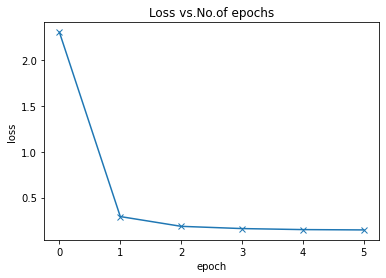

In [121]:
losses = [x['val_loss']for x in history]
plt.plot(losses, '-x')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss vs.No.of epochs')

Text(0.5, 1.0, 'Accuracy vs.No.of epochs')

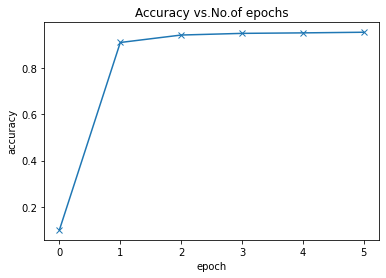

In [122]:
accuracies = [x['val_acc'] for x in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs.No.of epochs')

Our current model outperforms the logistic regression model (which could only achieve around 86% accuracy) by a considerable margin! It quickly reaches an accuracy of 97% but doesn't improve much beyond this. To improve accuracy further, we need to make the model more powerful by increasing the hidden layer's size or adding more hidden layers with activations. I encourage you to try out both these approaches and see which one works better.

In [123]:
import jovian

In [124]:
jovian.commit(project='04-feedforward-nn', environment=None)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "erfq1031/04-feedforward-nn" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Committed successfully! https://jovian.ai/erfq1031/04-feedforward-nn


'https://jovian.ai/erfq1031/04-feedforward-nn'

Testing with individual images
While we have been tracking the overall accuracy of a model so far, it's also a good idea to look at model's results on some sample images. Let's test out our model with some images from the predefined test dataset of 10000 images. We begin by recreating the test dataset with the ToTensor transform.

In [125]:
# Define test dataset
test_dataset = MNIST(root='data/',
                    train=False,
                    transform=ToTensor())

Let's define a helper function predict_image, which returns the predicted label for a single image tensor.

In [127]:
def predict_image(img, model):
    xb = to_device(img.unsqueeze(0), device)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

Let's try it out with a few images.

Label: 7 Predicted: 7


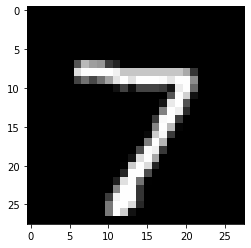

In [128]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:',label,'Predicted:',predict_image(img,model))

Label: 6 Predicted: 6


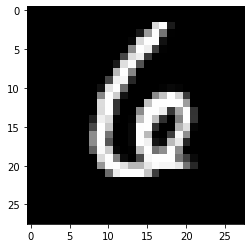

In [129]:
img, label = test_dataset[123]
plt.imshow(img[0], cmap='gray')
print('Label:',label,'Predicted:',predict_image(img,model))

Label: 9 Predicted: 9


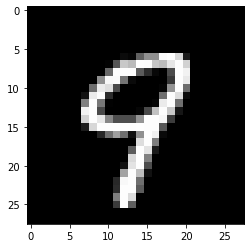

In [130]:
img, label = test_dataset[1532]
plt.imshow(img[0], cmap='gray')
print('Label:',label,'Predicted:',predict_image(img,model))

Identifying where our model performs poorly can help us improve the model, by collecting more training data, increasing/decreasing the complexity of the model, and changing the hypeparameters.
As a final step, let's also look at the overall loss and accuracy of the model on the test set.

In [131]:
test_loader = DeviceDataLoader(DataLoader(test_dataset, batch_size=256),device)
result= evaluate(model, test_loader)
result

{'val_loss': 0.1249273270368576, 'val_acc': 0.960742175579071}

We expect this to be similar to the accuracy/loss on the validation set. If not, we might need a better validation set that has similar data and distribution as the test set (which often comes from real world data).

In [133]:
jovian.log_metrics(test_loss=result['val_loss'], test_acc=result['val_loss'])

[jovian] Metrics logged.


In [134]:
torch.save(model.state_dict(), 'mnist-feedforward.pth')

In [135]:
jovian.commit(project='04-feedforward-nn', 
              environment=None, 
              outputs=['mnist-feedforward.pth'])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "erfq1031/04-feedforward-nn" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Uploading additional outputs...
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
[jovian] Committed successfully! https://jovian.ai/erfq1031/04-feedforward-nn


'https://jovian.ai/erfq1031/04-feedforward-nn'